In [1]:
!pip install imageai

You should consider upgrading via the 'c:\users\admin\desktop\mujj\wobb.ai\wobenv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
Using legacy 'setup.py install' for keras-resnet, since package 'wheel' is not installed.
    Running setup.py install for keras-resnet: started
    Running setup.py install for keras-resnet: finished with status 'done'


In [ ]:
#!wget "https://github.com/OlafenwaMoses/ImageAI/releases/download/essential-v4/pretrained-yolov3.h5"

#Download this h5 file and keep in the same directory

In [1]:
import numpy as np
import os
import shutil
from pathlib import Path
from PIL import Image


from imageai.Detection.Custom import DetectionModelTrainer
from imageai.Detection.Custom import CustomObjectDetection,CustomVideoObjectDetection
from imageai.Detection.Custom import DetectionModelTrainer

In [2]:
root_annots_path = 'Dataset/annotations/'
root_images_path = 'Dataset/images/'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)

classes = np.array(["helmet","head","person"])

In [3]:
with open(annots_path[500], 'r') as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>hard_hat_workers1469.png</filename>
    <size>
        <width>416</width>
        <height>416</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>360</xmin>
            <ymin>164</ymin>
            <xmax>384</xmax>
            <ymax>194</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>156</xmin>
            <ymin>218</ymin>
            <xmax>180</xmax>
            <ymax>247</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncat

In [4]:
os.makedirs('wobotai/data/train/images', exist_ok=True)
os.makedirs('wobotai/data/train/annotations', exist_ok=True)

os.makedirs('wobotai/data/validation/images', exist_ok=True)
os.makedirs('wobotai/data/validation/annotations', exist_ok=True)

os.makedirs('wobotai/data/test/images', exist_ok=True)
os.makedirs('wobotai/data/test/annotations', exist_ok=True)

In [5]:
n_imgs = 300
n_split = n_imgs // 20


for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):    
    if i > n_imgs:
        break
    if i < n_split:
        shutil.copy(img_path, 'wobotai/data/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'wobotai/data/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*5:
        shutil.copy(img_path, 'wobotai/data/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'wobotai/data/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, 'wobotai/data/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'wobotai/data/train/annotations/' + annot_path.parts[-1])

In [6]:
print(len(list(Path('wobotai/data/train/annotations/').glob('*.xml'))))
print(len(list(Path('wobotai/data/validation/annotations/').glob('*.xml'))))
print(len(list(Path('wobotai/data/test/annotations/').glob('*.xml'))))

226
60
15


In [7]:
%%time

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./wobotai/data/")
trainer.setTrainConfig(object_names_array=["helmet","head","person"],
                       batch_size=2,
                       num_experiments=2,
                       train_from_pretrained_model="pretrained-yolov3.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.77
Anchor Boxes generated.
Detection configuration saved in  ./wobotai/data/json\detection_config.json
Evaluating over 60 samples taken from ./wobotai/data/validation
Training over 226 samples  given at ./wobotai/data/train
Training on: 	['head', 'helmet', 'person']
Training with Batch Size:  2
Number of Training Samples:  226
Number of Validation Samples:  60
Number of Experiments:  2
Training with transfer learning from pretrained Model
Layer YoloLayer has arguments ['self', 'anchors', 'max_grid', 'batch_size', 'warmup_batches', 'ignore_thresh', 'grid_scale', 'obj_scale', 'noobj_scale', 'xywh_scale', 'class_scale']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config(

c:\users\admin\desktop\mujj\wobb.ai\wobenv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\users\admin\desktop\mujj\wobb.ai\wobenv\lib\site-packages\imageai\Detection\Custom\__init__.py:308: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_model.fit_generator(
c:\users\admin\desktop\mujj\wobb.ai\wobenv\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\users\admin\desktop\mujj\wobb.ai\wobenv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a conf

Epoch 1/2
904/904 [==============================] - 386s 424ms/step - loss: 35.2545 - yolo_layer_loss: 5.1507 - yolo_layer_1_loss: 9.0053 - yolo_layer_2_loss: 11.8426 - val_loss: 32.5889 - val_yolo_layer_loss: 7.9853 - val_yolo_layer_1_loss: 8.4788 - val_yolo_layer_2_loss: 9.9754 - lr: 1.0000e-04
Epoch 2/2
904/904 [==============================] - 382s 422ms/step - loss: 25.9263 - yolo_layer_loss: 4.5161 - yolo_layer_1_loss: 7.2389 - yolo_layer_2_loss: 8.9178 - val_loss: 31.5199 - val_yolo_layer_loss: 7.7872 - val_yolo_layer_1_loss: 9.5910 - val_yolo_layer_2_loss: 9.4618 - lr: 1.0000e-04
Wall time: 12min 53s


In [8]:

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./wobotai/data/")
metrics = trainer.evaluateModel(model_path="wobotai/data/models/",
                                json_path="wobotai/data/json/detection_config.json",
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 60 samples taken from ./wobotai/data/validation
Training over 226 samples  given at ./wobotai/data/train
Model File:  wobotai/data/models/detection_model-ex-001--loss-0035.254.h5 

Evaluation samples:  60
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
head: 0.0001
helmet: 0.1026
person: 0.0000
mAP: 0.0342
Model File:  wobotai/data/models/detection_model-ex-002--loss-0025.926.h5 

Evaluation samples:  60
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
head: 0.0000
helmet: 0.1537
person: 0.0000
mAP: 0.0512


In [28]:

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("wobotai/data/models/detection_model-ex-002--loss-0025.926.h5")
detector.setJsonPath("wobotai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=45,
                                             input_image="hard_hat_workers102.png",
                                             output_image_path="detected.png")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

person  :  45.16021907329559  :  [249, 177, 249, 177]
person  :  46.68934643268585  :  [249, 185, 249, 185]
person  :  45.776790380477905  :  [250, 193, 250, 193]


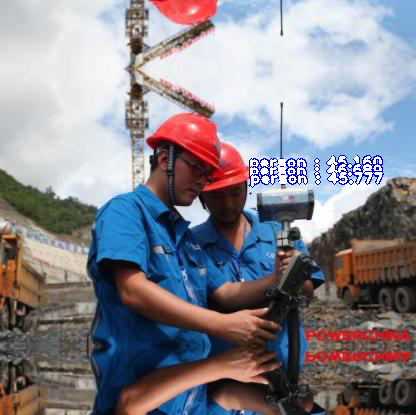

In [23]:
Image.open('detected.png')

In [ ]:
%%time

execution_path = os.getcwd()

video_detector = CustomVideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath("wobotai/data/models/detection_model-ex-002--loss-0025.926.h5")
video_detector.setJsonPath("wobotai/data/json/detection_config.json")
video_detector.loadModel()

video_detector.detectObjectsFromVideo(input_file_path="Top 10 Safety Vest For Construction For Men And Women.mp4",
                                        output_file_path=os.path.join(execution_path, "custom Youtube video file by Mujtaba"),
                                        frames_per_second=5,
                                        minimum_percentage_probability=45,
                                        log_progress=True)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

Processing Frame :  347
Processing Frame :  348
Processing Frame :  349
Processing Frame :  350
Processing Frame :  351
Processing Frame :  352
Processing Frame :  353
Processing Frame :  354
Processing Frame :  355
Processing Frame :  356
Processing Frame :  357
Processing Frame :  358
Processing Frame :  359
Processing Frame :  360
Processing Frame :  361
Processing Frame :  362
Processing Frame :  363
Processing Frame :  364
Processing Frame :  365
Processing Frame :  366
Processing Frame :  367
Processing Frame :  368
Processing Frame :  369
Processing Frame :  370
Processing Frame :  371
Processing Frame :  372
Processing Frame :  373
Processing Frame :  374
Processing Frame :  375
Processing Frame :  376
Processing Frame :  377
Processing Frame :  378
Processing Frame :  379
Processing Frame :  380
Processing Frame :  381
Processing Frame :  382
Processing Frame :  383
Processing Frame :  384
Processing Frame :  385
Processing Frame :  386
Processing Frame :  387
Processing Frame

Processing Frame :  690
Processing Frame :  691
Processing Frame :  692
Processing Frame :  693
Processing Frame :  694
Processing Frame :  695
Processing Frame :  696
Processing Frame :  697
Processing Frame :  698
Processing Frame :  699
Processing Frame :  700
Processing Frame :  701
Processing Frame :  702
Processing Frame :  703
Processing Frame :  704
Processing Frame :  705
Processing Frame :  706
Processing Frame :  707
Processing Frame :  708
Processing Frame :  709
Processing Frame :  710
Processing Frame :  711
Processing Frame :  712
Processing Frame :  713
Processing Frame :  714
Processing Frame :  715
Processing Frame :  716
Processing Frame :  717
Processing Frame :  718
Processing Frame :  719
Processing Frame :  720
Processing Frame :  721
Processing Frame :  722
Processing Frame :  723
Processing Frame :  724
Processing Frame :  725
Processing Frame :  726
Processing Frame :  727
Processing Frame :  728
Processing Frame :  729
Processing Frame :  730
Processing Frame

Processing Frame :  1032
Processing Frame :  1033
Processing Frame :  1034
Processing Frame :  1035
Processing Frame :  1036
Processing Frame :  1037
Processing Frame :  1038
Processing Frame :  1039
Processing Frame :  1040
Processing Frame :  1041
Processing Frame :  1042
Processing Frame :  1043
Processing Frame :  1044
Processing Frame :  1045
Processing Frame :  1046
Processing Frame :  1047
Processing Frame :  1048
Processing Frame :  1049
Processing Frame :  1050
Processing Frame :  1051
Processing Frame :  1052
Processing Frame :  1053
Processing Frame :  1054
Processing Frame :  1055
Processing Frame :  1056
Processing Frame :  1057
Processing Frame :  1058
Processing Frame :  1059
Processing Frame :  1060
Processing Frame :  1061
Processing Frame :  1062
Processing Frame :  1063
Processing Frame :  1064
Processing Frame :  1065
Processing Frame :  1066
Processing Frame :  1067
Processing Frame :  1068
Processing Frame :  1069
Processing Frame :  1070
Processing Frame :  1071


Processing Frame :  1360
Processing Frame :  1361
Processing Frame :  1362
Processing Frame :  1363
Processing Frame :  1364
Processing Frame :  1365
Processing Frame :  1366
Processing Frame :  1367
Processing Frame :  1368
Processing Frame :  1369
Processing Frame :  1370
Processing Frame :  1371
Processing Frame :  1372
Processing Frame :  1373
Processing Frame :  1374
Processing Frame :  1375
Processing Frame :  1376
Processing Frame :  1377
Processing Frame :  1378
Processing Frame :  1379
Processing Frame :  1380
Processing Frame :  1381
Processing Frame :  1382
Processing Frame :  1383
Processing Frame :  1384
Processing Frame :  1385
Processing Frame :  1386
Processing Frame :  1387
Processing Frame :  1388
Processing Frame :  1389
Processing Frame :  1390
Processing Frame :  1391
Processing Frame :  1392
Processing Frame :  1393
Processing Frame :  1394
Processing Frame :  1395
Processing Frame :  1396
Processing Frame :  1397
Processing Frame :  1398
Processing Frame :  1399


Processing Frame :  1688
Processing Frame :  1689
Processing Frame :  1690
Processing Frame :  1691
Processing Frame :  1692
Processing Frame :  1693
Processing Frame :  1694
Processing Frame :  1695
Processing Frame :  1696
Processing Frame :  1697
Processing Frame :  1698
Processing Frame :  1699
Processing Frame :  1700
Processing Frame :  1701
Processing Frame :  1702
Processing Frame :  1703
Processing Frame :  1704
Processing Frame :  1705
Processing Frame :  1706
Processing Frame :  1707
Processing Frame :  1708
Processing Frame :  1709
Processing Frame :  1710
Processing Frame :  1711
Processing Frame :  1712
Processing Frame :  1713
Processing Frame :  1714
Processing Frame :  1715
Processing Frame :  1716
Processing Frame :  1717
Processing Frame :  1718
Processing Frame :  1719
Processing Frame :  1720
Processing Frame :  1721
Processing Frame :  1722
Processing Frame :  1723
Processing Frame :  1724
Processing Frame :  1725
Processing Frame :  1726
Processing Frame :  1727


Processing Frame :  2016
Processing Frame :  2017
Processing Frame :  2018
